In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/train-delays/delays.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [3]:
#Reading dataset
df = pd.read_csv('/kaggle/input/train-delays/delays.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718170 entries, 0 to 3718169
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   datetime    object
 1   id          object
 2   carrier     object
 3   date        object
 4   connection  object
 5   arrival     object
 6   delay       object
 7   name        object
dtypes: object(8)
memory usage: 226.9+ MB


In [5]:
df.head()

,datetime,id,carrier,date,connection,arrival,delay,name
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29,0 min,Warszawa Zachodnia
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34,0 min,Warszawa Zachodnia
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55,0 min,Warszawa Zachodnia


In [6]:
df.isnull().sum()

datetime      0
id            0
carrier       0
date          0
connection    0
arrival       0
delay         0
name          0
dtype: int64

In [7]:
df['datetime'].unique()

array(['2022-05-16 00:00:00', '2022-05-16 00:05:00',
       '2022-05-16 00:10:00', ..., '2022-05-29 23:45:00',
       '2022-05-29 23:50:00', '2022-05-29 23:55:00'], dtype=object)

In [8]:
df['date'].unique()

array(['2022-05-15', '2022-05-16', '2022-05-17', '2022-05-18',
       '2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
       '2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
       '2022-05-27', '2022-05-28', '2022-05-29', '2022-05-30'],
      dtype=object)

In [9]:
df.value_counts('carrier')

carrier
PKP Intercity                       1271352
Koleje Mazowieckie                   771112
PKP SKM w Trójmieście Sp. z o.o.     517534
POLREGIO Sp. z o.o.                  403889
SKM Warszawa                         341189
Koleje Śląskie                       251275
Łódzka Kolej Aglomeracyjna            75635
Koleje Wielkopolskie                  43306
Koleje Dolnośląskie                   38342
Arriva                                 4536
dtype: int64

In [10]:
# creating a new column; it will tell if the train was delayed or not
result=[]

In [11]:
for row in df['delay']:
  if row > '0 min':
    result.append(1)
  else:
    result.append(0) 

In [12]:
df['result'] = result

In [13]:
df.value_counts('result')

result
0    2834968
1     883202
dtype: int64

In [14]:
df.head()

,datetime,id,carrier,date,connection,arrival,delay,name,result
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia,1
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia,0
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29,0 min,Warszawa Zachodnia,0
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34,0 min,Warszawa Zachodnia,0
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55,0 min,Warszawa Zachodnia,0


In [15]:

df['trans_date_trans_time'] = pd.to_datetime(df['date'])
df['week_number'] = df['trans_date_trans_time'].dt.dayofweek
assert df['week_number'].max() == 6
df['month_number'] = df['trans_date_trans_time'].dt.month
assert df['month_number'].max() == 5
df['year'] = df['trans_date_trans_time'].dt.year
df.head()

,datetime,id,carrier,date,connection,arrival,delay,name,result,trans_date_trans_time,week_number,month_number,year
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,PKP Intercity,2022-05-15,Bohumin - Warszawa Wschodnia,21:31,162 min,Warszawa Zachodnia,1,2022-05-15,6,5,2022
1,2022-05-16 00:00:00,91888/9 (102),Koleje Mazowieckie,2022-05-16,Siedlce - Warszawa Zachodnia,00:15,0 min,Warszawa Zachodnia,0,2022-05-16,0,5,2022
2,2022-05-16 00:00:00,21644/5 (102),Koleje Mazowieckie,2022-05-16,Radom Główny - Warszawa Wschodnia,00:29,0 min,Warszawa Zachodnia,0,2022-05-16,0,5,2022
3,2022-05-16 00:00:00,19300/1 (102),Koleje Mazowieckie,2022-05-16,Warszawa Wschodnia - Grodzisk Mazowiecki,00:34,0 min,Warszawa Zachodnia,0,2022-05-16,0,5,2022
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,PKP Intercity,2022-05-16,Kraków Główny - Kołobrzeg,00:55,0 min,Warszawa Zachodnia,0,2022-05-16,0,5,2022


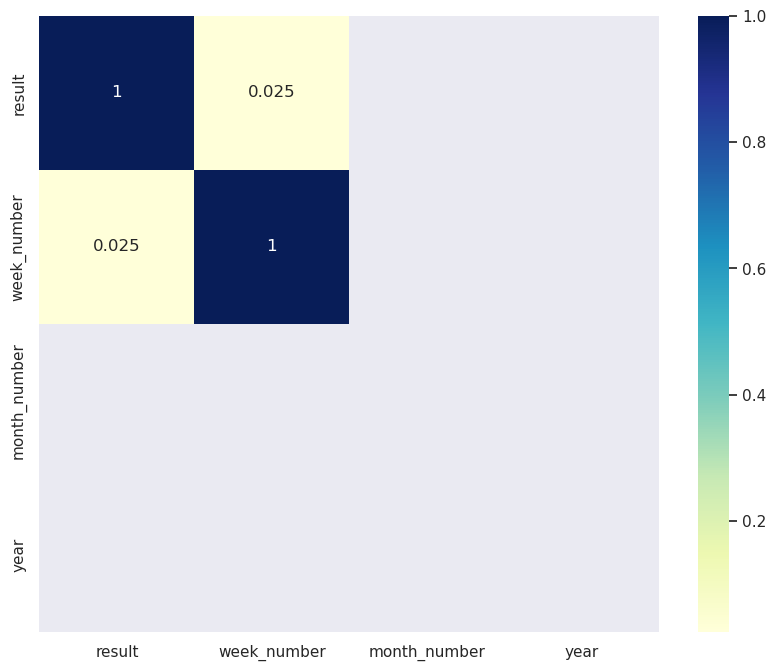

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

<AxesSubplot:title={'center':'Number of delay by carrier'}, xlabel='carrier', ylabel='result'>

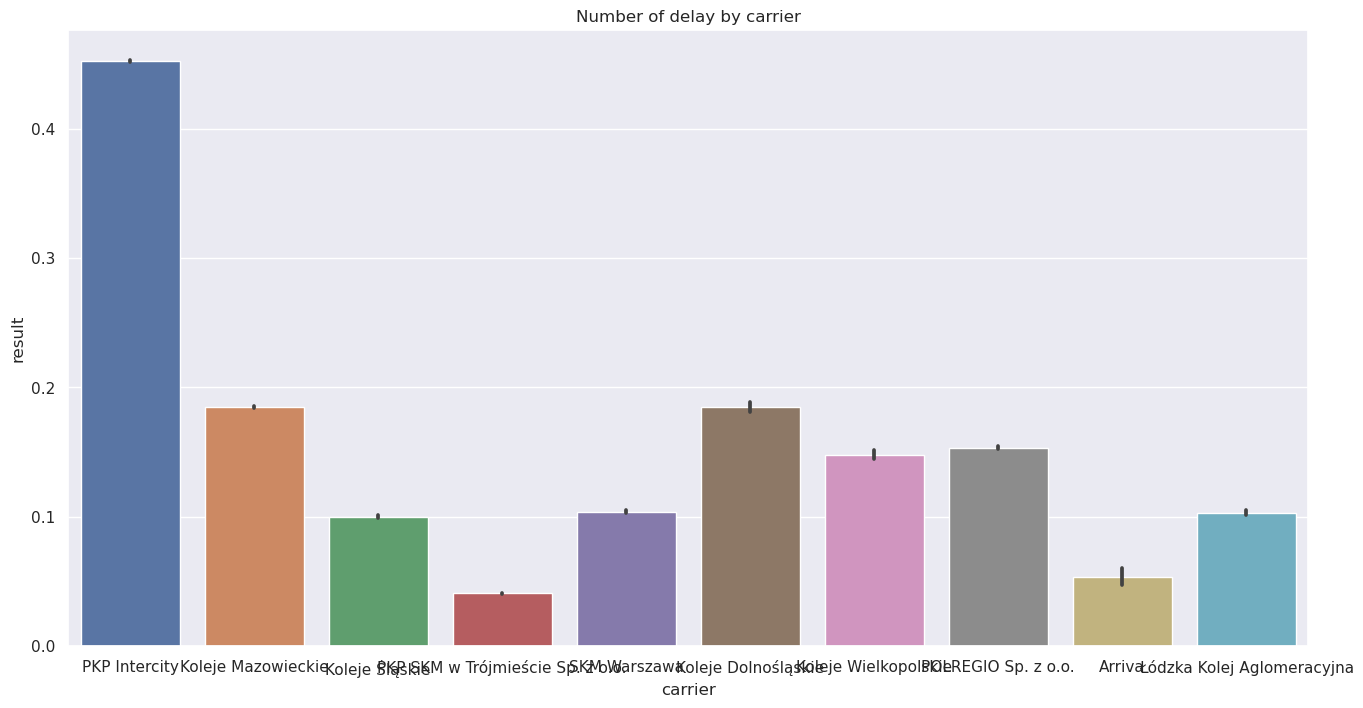

In [17]:
# Category
plt.figure(figsize=(16,8))
plt.title('Number of delay by carrier')
sns.barplot(x="carrier", y='result' ,data=df)

In [18]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in columns
df['connection']= label_encoder.fit_transform(df['connection'])
df['carrier']= label_encoder.fit_transform(df['carrier'])
df['name']= label_encoder.fit_transform(df['name'])

In [19]:
df.head()

,datetime,id,carrier,date,connection,arrival,delay,name,result,trans_date_trans_time,week_number,month_number,year
0,2022-05-16 00:00:00,41002/3 (102) POLONIA,5,2022-05-15,23,21:31,162 min,81,1,2022-05-15,6,5,2022
1,2022-05-16 00:00:00,91888/9 (102),2,2022-05-16,583,00:15,0 min,81,0,2022-05-16,0,5,2022
2,2022-05-16 00:00:00,21644/5 (102),2,2022-05-16,541,00:29,0 min,81,0,2022-05-16,0,5,2022
3,2022-05-16 00:00:00,19300/1 (102),2,2022-05-16,767,00:34,0 min,81,0,2022-05-16,0,5,2022
4,2022-05-16 00:00:00,38170/1 (102) USTRONIE,5,2022-05-16,290,00:55,0 min,81,0,2022-05-16,0,5,2022


In [20]:
df.describe()  # General statistics

,carrier,connection,name,result,week_number,month_number,year
count,3.718170e+06,3.718170e+06,3.718170e+06,3.718170e+06,3.718170e+06,3718170.0,3718170.0
mean,4.952705e+00,4.694647e+02,5.201990e+01,2.375367e-01,2.904992e+00,5.0,2022.0
std,1.974580e+00,2.924285e+02,2.884978e+01,4.255738e-01,1.969826e+00,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.0,2022.0
25%,4.000000e+00,1.650000e+02,2.700000e+01,0.000000e+00,1.000000e+00,5.0,2022.0
50%,5.000000e+00,4.680000e+02,5.500000e+01,0.000000e+00,3.000000e+00,5.0,2022.0
75%,6.000000e+00,7.450000e+02,7.900000e+01,0.000000e+00,5.000000e+00,5.0,2022.0
max,9.000000e+00,9.940000e+02,9.400000e+01,1.000000e+00,6.000000e+00,5.0,2022.0


In [21]:
# filtering out unnecessary columns
df=df.drop(['date','datetime','id','delay','arrival','trans_date_trans_time'],axis=1)

In [22]:
X = df.drop(['result'],axis = 1).copy()
y = df['result'].copy()

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)  # splitting in the ratio 70:30

In [24]:
#importing library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [25]:
#importing library
from sklearn.svm import SVC

In [26]:
#First making a model without any hyperparameter tuning
svc = SVC(random_state=42)
svc.fit(X_train_scaled[:1000],y_train[:1000])

SVC(random_state=42)

## Confusion Matrix

In [27]:
#importing library
from sklearn.metrics import plot_confusion_matrix

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


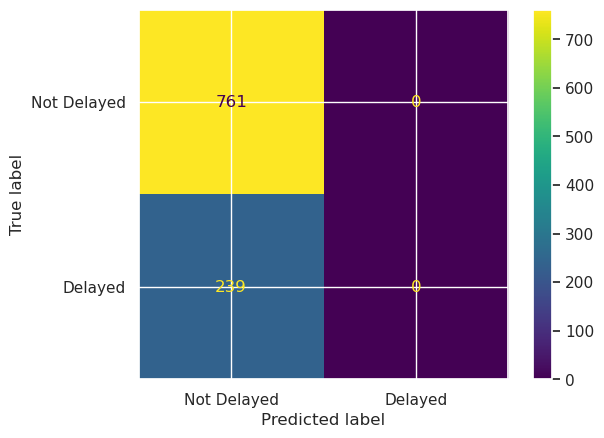

In [28]:
#Confusion matrix for training set
plot_confusion_matrix(svc,X_train_scaled[:1000],y_train[:1000],display_labels = ['Not Delayed','Delayed'])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


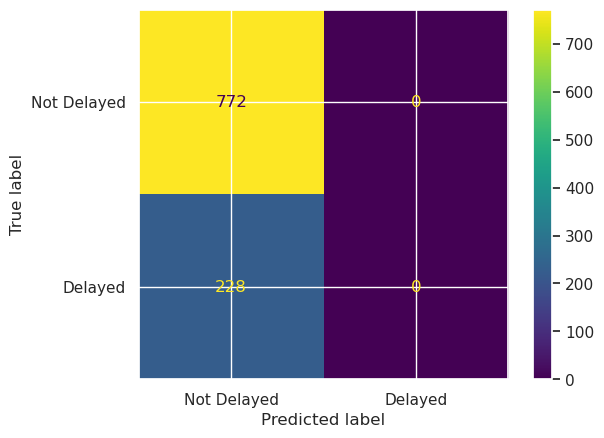

In [29]:
#Confusion Matrix for test set

X_test_scaled = scaler.transform(X_test)
plot_confusion_matrix(svc,X_test_scaled[:1000],y_test[:1000],display_labels = ['Not Delayed','Delayed'])

In [30]:
y_pred = svc.predict(X_test[:1000])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification report")
print(classification_report(y_test[:1000], y_pred))


Classification report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       772
           1       0.00      0.00      0.00       228

    accuracy                           0.77      1000
   macro avg       0.39      0.50      0.44      1000
weighted avg       0.60      0.77      0.67      1000



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [34]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train_scaled[:1000],y_train[:1000])

SyntaxError: unexpected EOF while parsing (2437820571.py, line 4)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

#predicting the test data labels
predictions = classifier.predict(X_test[:1000])
#getting the acuuracy score
print("Naive Bayes accuracy score: ", accuracy_score(predictions,y_test[:1000])*100)

Naive Bayes accuracy score:  75.2


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [38]:
cf=confusion_matrix(predictions, y_test[:1000])

<AxesSubplot:>

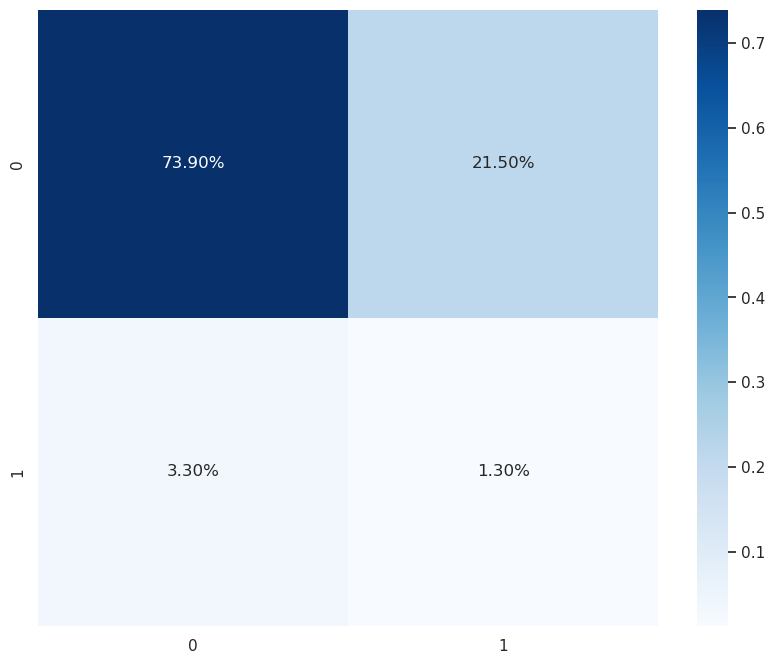

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification report")
print(classification_report(predictions, y_test[:1000]))

Classification report
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       954
           1       0.06      0.28      0.09        46

    accuracy                           0.75      1000
   macro avg       0.51      0.53      0.48      1000
weighted avg       0.92      0.75      0.82      1000



https://www.kaggle.com/datasets/bartek358/train-delays/versions/1